In [0]:
  #!pip install fastai==0.7.0

In [0]:
!pip install featuretools

    100% |████████████████████████████████| 8.9MB 4.3MB/s 
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


In [0]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Fast ai imports
#from fastai.imports import *
#from fastai.structured import *


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
plt.style.use('fivethirtyeight')

In [0]:
!unzip train_revised_11.09.2018.zip

Archive:  train_revised_11.09.2018.zip
  inflating: train_revised.csv       


In [0]:
train=pd.read_csv('train_revised.csv')
test=pd.read_csv('test_questions.csv')

In [0]:
drop=train[train['travel_from']=='Keumbu'].index

In [0]:
for i in drop:
  train.drop(i,inplace=True)

In [0]:
drop1=train[train['travel_from']=='Kendu Bay'].index

In [0]:
for i in drop1:
  train.drop(i,inplace=True)

In [0]:
train.drop(['seat_number','payment_method','payment_receipt'],axis=1,inplace=True)

In [0]:
no_tickets=train.groupby(['ride_id']).size()
no_tickets=pd.DataFrame(no_tickets)
no_tickets.reset_index(inplace=True)
train=pd.merge(train,no_tickets, on='ride_id', how='left')
train.rename(columns={0: "no_tickets"},inplace=True)

In [0]:
train.drop_duplicates(inplace=True)

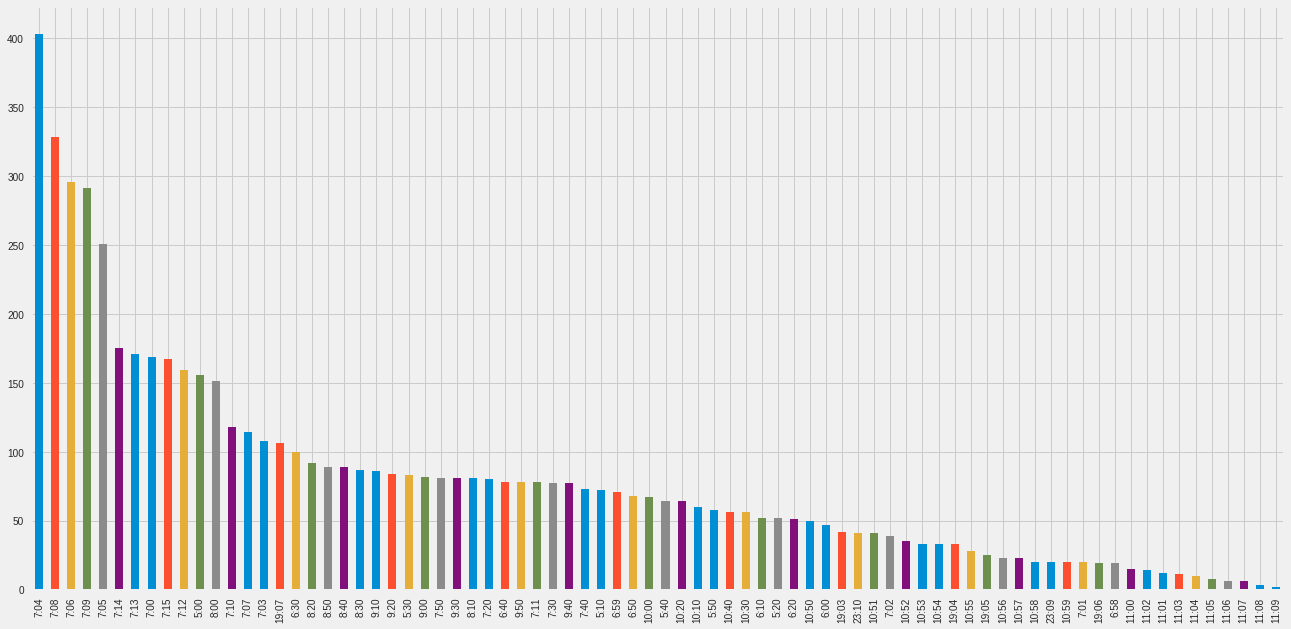

In [0]:
train['hour_booked'] = pd.DatetimeIndex(train["travel_time"]).hour
test['hour_booked'] = pd.DatetimeIndex(test["travel_time"]).hour

In [0]:
#train['hour_booked'].value_counts().sort_index().plot.bar()

In [0]:
#test['hour_booked'].value_counts().sort_index().plot.bar()

In [0]:
train["period"] = train.hour_booked.apply(lambda x:"Early" if x in [5, 6] else "peak" if x in [7] else "Morning" if x in [8,9,10] else "Noon" if x in [11]  else "evening" if x in [19] else "Night" if x in [23] else "None")
test["period"] = test.hour_booked.apply(lambda x:"Early" if x in [5, 6] else "peak" if x in [7] else "Morning" if x in [8,9,10] else "Noon" if x in [11]  else "evening" if x in [19] else "Night" if x in [23] else "None")

In [0]:
train["travel_time_enc"] = train["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
test["travel_time_enc"] = test["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [0]:
#make a frquency count of hour book like encoding
hourbookencoding=train.groupby('hour_booked').size()
hourbookencoding=hourbookencoding/len(train)
train['hour_booked_freq']=train.hour_booked.map(hourbookencoding)

In [0]:
#make a frquency count of hour book like encoding
_=test.groupby('hour_booked').size()
_=_/len(test)
test['hour_booked_freq']=test.hour_booked.map(_)

In [0]:
train['travel_date'] = pd.to_datetime(train['travel_date'])
test['travel_date'] = pd.to_datetime(test['travel_date'])

In [0]:
train['day'] = train['travel_date'].dt.strftime('%w')
test['day'] = test['travel_date'].dt.strftime('%w')

In [0]:
#train.day.value_counts().sort_index().plot.bar()

check the day pattern for both 2017 and 2018

In [0]:
#test.day.value_counts().sort_index().plot.bar()

In [0]:
train['month'] = train['travel_date'].dt.strftime('%m')
test['month'] = test['travel_date'].dt.strftime('%m')

In [0]:
#train.month.value_counts().sort_index().plot.bar()

lots of people did travel on december

In [0]:
train['year'] = train['travel_date'].dt.strftime('%Y')
test['year'] = test['travel_date'].dt.strftime('%Y')

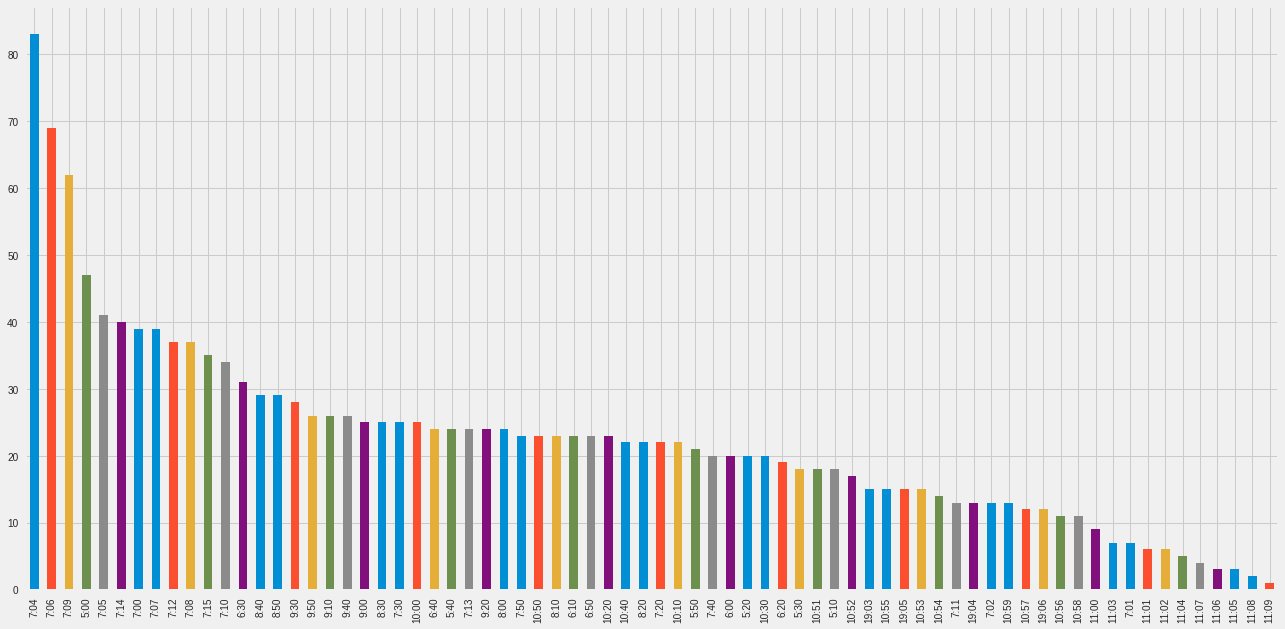

In [0]:
plt.figure(figsize=(20,10))
train[train['year']=='2017']['travel_time'].value_counts().plot.bar()

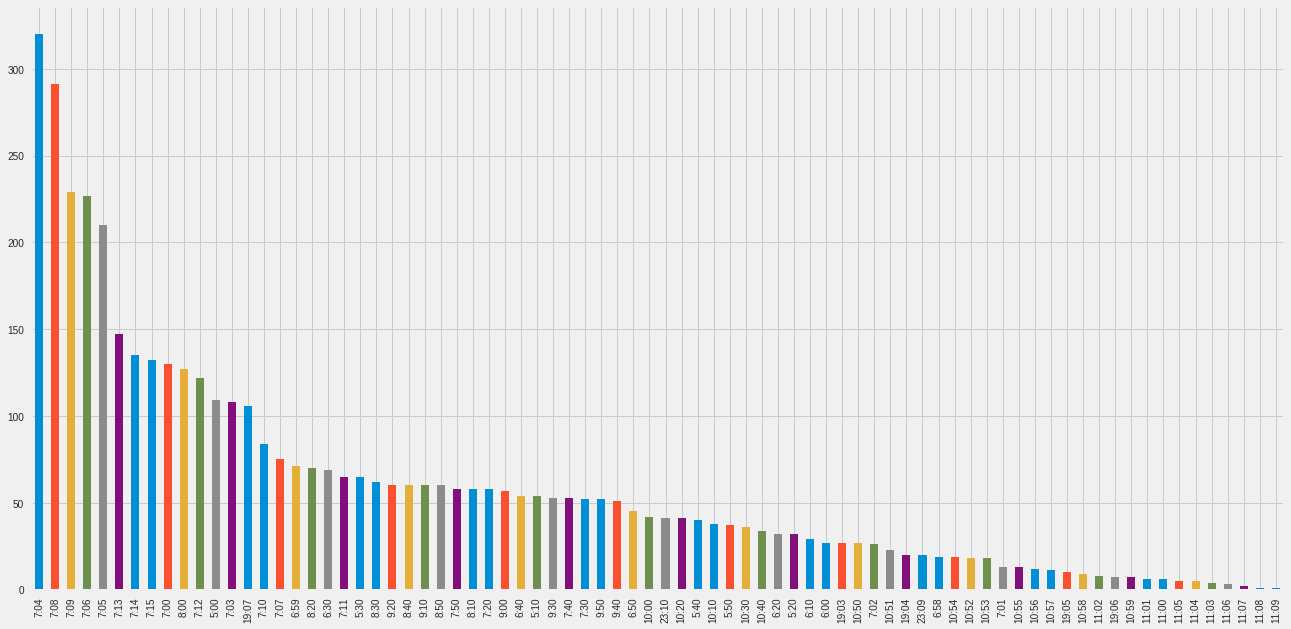

In [0]:
plt.figure(figsize=(20,10))
train[train['year']=='2018']['travel_time'].value_counts().plot.bar()

In [0]:
hourmap={23:1,11:2,19:3,5:4,6:5,9:6,8:7,10:8,7:9}

In [0]:
train['hour_map']=train['hour_booked'].map(hourmap)

In [0]:
test['hour_map']=test['hour_booked'].map(hourmap)

In [0]:
#train.year.value_counts().sort_index().plot.bar()

wow seem's like 2018 was a travelling year

In [0]:
train['month_year'] = train['travel_date'].dt.strftime('%Y-%m')
test['month_year'] = test['travel_date'].dt.strftime('%Y-%m')

In [0]:
train.head(2)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,no_tickets,hour_booked,period,travel_time_enc,hour_booked_freq,day,month,year,hour_map,month_year
0,1442,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,7,peak,435,0.513487,2,10,2017,9,2017-10
1,5437,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,7,peak,432,0.513487,0,11,2017,9,2017-11


In [0]:
test.head(2)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,hour_booked,period,travel_time_enc,hour_booked_freq,day,month,year,hour_map,month_year
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,7,peak,426,0.433843,1,05,2018,9,2018-05
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,11,Noon,668,0.046805,0,05,2018,2,2018-05


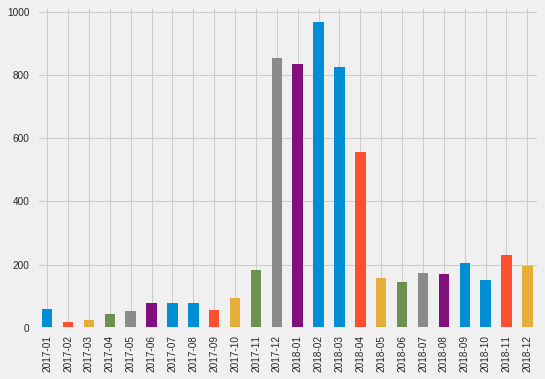

In [0]:
train['month_year'].value_counts().sort_index().plot.bar()

we can see that more people travelled 2017  december far more than the same month in 2018 

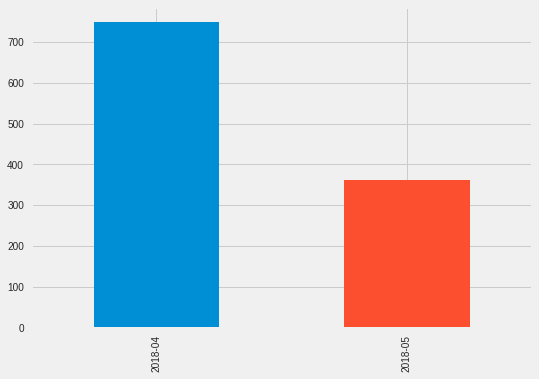

In [0]:
test['month_year'].value_counts().sort_index().plot.bar()

In [0]:
target=train['no_tickets']

In [0]:
test.drop(['travel_to'],axis=1,inplace=True)
train.drop(['travel_to'],axis=1,inplace=True)

In [0]:
#train['no_tickets'].plot.hist(bins=100)

In [0]:
_=train.groupby('month_year').size()
_=_/len(train)
train['month_year_freq']=train.month_year.map(_)

In [0]:
train['month_year_counts']=train.month_year.map(train.month_year.value_counts()/100)

In [0]:
train.drop(['travel_date','travel_time','no_tickets'], axis=1, inplace=True)

In [0]:
train.head()

,ride_id,travel_from,car_type,max_capacity,hour_booked,period,travel_time_enc,hour_booked_freq,day,month,year,hour_map,month_year,month_year_freq,month_year_counts,travel_from_freq,travel_from_counts
0,1442,Migori,Bus,49,7,peak,435,0.513487,2,10,2017,9,2017-10,0.015254,0.95,0.061978,3.86
1,5437,Migori,Bus,49,7,peak,432,0.513487,0,11,2017,9,2017-11,0.029223,1.82,0.061978,3.86
2,5710,Keroka,Bus,49,7,peak,425,0.513487,0,11,2017,9,2017-11,0.029223,1.82,0.050096,3.12
3,5777,Homa Bay,Bus,49,7,peak,430,0.513487,1,11,2017,9,2017-11,0.029223,1.82,0.057161,3.56
4,5778,Migori,Bus,49,7,peak,432,0.513487,1,11,2017,9,2017-11,0.029223,1.82,0.061978,3.86


In [0]:
_=test.groupby('month_year').size()
_=_/len(test)
test['month_year_freq']=test.month_year.map(_)

In [0]:
test['month_year_counts']=test.month_year.map(test.month_year.value_counts()/100)

In [0]:
test.drop(['travel_date','travel_time'], axis=1, inplace=True)

In [0]:
test.head()

,ride_id,travel_from,car_type,max_capacity,hour_booked,period,travel_time_enc,hour_booked_freq,day,month,year,hour_map,month_year,month_year_freq,month_year_counts,travel_from_freq,travel_from_counts
0,247,Kisii,Bus,49,7,peak,426,0.433843,1,05,2018,9,2018-05,0.326733,3.63,0.490549,5.45
1,256,Kisii,shuttle,11,11,Noon,668,0.046805,0,05,2018,2,2018-05,0.326733,3.63,0.490549,5.45
2,275,Kisii,shuttle,11,5,Early,300,0.044104,5,05,2018,4,2018-05,0.326733,3.63,0.490549,5.45
3,285,Kisii,shuttle,11,9,Morning,550,0.062106,5,05,2018,6,2018-05,0.326733,3.63,0.490549,5.45
4,286,Kisii,shuttle,11,9,Morning,560,0.062106,5,05,2018,6,2018-05,0.326733,3.63,0.490549,5.45


In [0]:
_=test.groupby('travel_from').size()
_=_/len(test)
test['travel_from_freq']=test.travel_from.map(_)

In [0]:
_=train.groupby('travel_from').size()
_=_/len(train)
train['travel_from_freq']=train.travel_from.map(_)

In [0]:
train['travel_from_counts']=train.travel_from.map(train.travel_from.value_counts()/100)

In [0]:
test['travel_from_counts']=test.travel_from.map(test.travel_from.value_counts()/100)

In [0]:
train.shape

(6228, 17)

In [0]:
test.shape

(1111, 17)

In [0]:
data=train.append(test,ignore_index=True)

In [0]:
data.shape

(7339, 17)

In [0]:
periods_dict={'Early':1,'Morning':2,'evening':3,'Noon':4,'Night':5,'peak':6}

In [0]:
car_dict={'Bus':1, 'shuttle':2}

In [0]:
travel_from_dict={'Migori':0, 'Keroka':1, 'Homa Bay':2, 'Kisii':3, 'Keumbu':4, 'Rongo':5,'Kijauri':6, 'Oyugis':7, 'Awendo':8, 'Sirare':9, 'Nyachenge':10, 'Kehancha':11,'Kendu Bay':12, 'Sori':13, 'Rodi':14, 'Mbita':15, 'Ndhiwa':16}

In [0]:
month_year_dict={'2017-10':0, '2017-11':1, '2018-04':2, '2018-12':3, '2018-11':4, '2018-10':5,
       '2018-09':6, '2018-08':7, '2018-07':8, '2018-06':9, '2018-05':10, '2018-03':11,
       '2018-02':12, '2018-01':13, '2017-01':14, '2017-02':15, '2017-03':16, '2017-04':17,
       '2017-05':18, '2017-06':19, '2017-07':20, '2017-08':21, '2017-09':22,'2017-12':23}

In [0]:
data['period'] = data['period'].replace(periods_dict, regex=True)

In [0]:
data['car_type'] = data['car_type'].replace(car_dict, regex=True)

In [0]:
year_dict={'2017':0, '2018':1}

In [0]:
data['year'] = data['year'].replace(year_dict, regex=True)

In [0]:
#data['travel_from_enc'] = data['travel_from'].replace(travel_from_dict, regex=True)

In [0]:
#data['month_year_enc'] = data['month_year'].replace(month_year_dict, regex=True)

In [0]:
data['max_capacity'].value_counts()

49    3784
11    3555
Name: max_capacity, dtype: int64

use one hot encoding for month_year

In [0]:
data.shape

(7339, 17)

In [0]:
#data.month_year=pd.to_numeric(data.month_year)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 17 columns):
ride_id               7339 non-null int64
travel_from           7339 non-null object
car_type              7339 non-null int64
max_capacity          7339 non-null int64
hour_booked           7339 non-null int64
period                7339 non-null int64
travel_time_enc       7339 non-null int64
hour_booked_freq      7339 non-null float64
day                   7339 non-null object
month                 7339 non-null object
year                  7339 non-null int64
hour_map              7339 non-null int64
month_year            7339 non-null object
month_year_freq       7339 non-null float64
month_year_counts     7339 non-null float64
travel_from_freq      7339 non-null float64
travel_from_counts    7339 non-null float64
dtypes: float64(5), int64(8), object(4)
memory usage: 974.8+ KB


In [0]:
import featuretools as ft

In [0]:
# creating and entity set 'es'
es = ft.EntitySet(id ='no_tickets')

In [0]:
es.entity_from_dataframe(entity_id ='data',dataframe =data,index ='ride_id')

Entityset: no_tickets
  Entities:
    data [Rows: 7339, Columns: 17]
  Relationships:
    No relationships

In [0]:
es['data']

Entity: data
  Variables:
    ride_id (dtype: index)
    travel_from (dtype: categorical)
    car_type (dtype: numeric)
    max_capacity (dtype: numeric)
    hour_booked (dtype: numeric)
    period (dtype: numeric)
    travel_time_enc (dtype: numeric)
    hour_booked_freq (dtype: numeric)
    day (dtype: categorical)
    month (dtype: categorical)
    year (dtype: numeric)
    hour_map (dtype: numeric)
    month_year (dtype: datetime)
    month_year_freq (dtype: numeric)
    month_year_counts (dtype: numeric)
    travel_from_freq (dtype: numeric)
    travel_from_counts (dtype: numeric)
  Shape:
    (Rows: 7339, Columns: 17)

In [0]:
es.normalize_entity(base_entity_id='data',new_entity_id='period',index ='ride_id',additional_variables =['period','hour_booked','travel_from','month_year','year','month','hour_map'])

Entityset: no_tickets
  Entities:
    data [Rows: 7339, Columns: 10]
    period [Rows: 7339, Columns: 8]
  Relationships:
    data.ride_id -> period.ride_id

In [0]:
es['data']

Entity: data
  Variables:
    ride_id (dtype: id)
    car_type (dtype: numeric)
    max_capacity (dtype: numeric)
    travel_time_enc (dtype: numeric)
    hour_booked_freq (dtype: numeric)
    day (dtype: categorical)
    month_year_freq (dtype: numeric)
    month_year_counts (dtype: numeric)
    travel_from_freq (dtype: numeric)
    travel_from_counts (dtype: numeric)
  Shape:
    (Rows: 7339, Columns: 10)

In [0]:
es['period']

Entity: period
  Variables:
    ride_id (dtype: index)
    period (dtype: numeric)
    hour_booked (dtype: numeric)
    travel_from (dtype: categorical)
    month_year (dtype: datetime)
    year (dtype: numeric)
    month (dtype: categorical)
    hour_map (dtype: numeric)
  Shape:
    (Rows: 7339, Columns: 8)

In [0]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
target_entity='data', 
max_depth = 2, 
verbose = 1, 
n_jobs = -1)

Built 69 features
EntitySet scattered to workers in 1.071 seconds
Elapsed: 00:19 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [0]:
feature_matrix.dropna(axis=1,inplace=True)

In [0]:
feature_matrix.head().transpose()

ride_id,247,256,275,285,286
car_type,1,2,2,2,2
max_capacity,49,11,11,11,11
travel_time_enc,426,668,300,550,560
hour_booked_freq,0.433843,0.0468047,0.0441044,0.0621062,0.0621062
day,1,0,5,5,5
month_year_freq,0.326733,0.326733,0.326733,0.326733,0.326733
month_year_counts,3.63,3.63,3.63,3.63,3.63
travel_from_freq,0.490549,0.490549,0.490549,0.490549,0.490549
travel_from_counts,5.45,5.45,5.45,5.45,5.45
period.period,6,4,1,2,2


In [0]:
feature_matrix.shape

(7339, 53)

In [0]:
feature_matrix = feature_matrix.reindex(index=data['ride_id'])
feature_matrix = feature_matrix.reset_index()

In [0]:
feature_matrix.shape

(7339, 54)

In [0]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 54 columns):
ride_id                                 7339 non-null int64
car_type                                7339 non-null int64
max_capacity                            7339 non-null int64
travel_time_enc                         7339 non-null int64
hour_booked_freq                        7339 non-null float64
day                                     7339 non-null object
month_year_freq                         7339 non-null float64
month_year_counts                       7339 non-null float64
travel_from_freq                        7339 non-null float64
travel_from_counts                      7339 non-null float64
period.period                           7339 non-null int64
period.hour_booked                      7339 non-null int64
period.travel_from                      7339 non-null object
period.year                             7339 non-null int64
period.month                            7

In [0]:
!pip install catboost

    100% |████████████████████████████████| 55.3MB 828kB/s 


In [0]:
!pip install lightgbm

In [0]:
!pip install xgboost

In [0]:
#feature_matrix.drop(['ride_id'], axis=1, inplace=True)
traindata = feature_matrix[:6228]
testdata = feature_matrix[6228:]

In [0]:
traindata.shape

(6228, 54)

In [0]:
testdata.shape

(1111, 54)

In [0]:
traindata.head()

,ride_id,car_type,max_capacity,travel_time_enc,hour_booked_freq,day,month_year_freq,month_year_counts,travel_from_freq,travel_from_counts,...,period.MEAN(data.month_year_freq),period.MEAN(data.month_year_counts),period.MEAN(data.travel_from_freq),period.MEAN(data.travel_from_counts),period.NUM_UNIQUE(data.day),period.MODE(data.day),period.DAY(month_year),period.YEAR(month_year),period.MONTH(month_year),period.WEEKDAY(month_year)
0,1442,1,49,435,0.513487,2,0.015254,0.95,0.061978,3.86,...,0.015254,0.95,0.061978,3.86,1,2,1,2017,10,6
1,5437,1,49,432,0.513487,0,0.029223,1.82,0.061978,3.86,...,0.029223,1.82,0.061978,3.86,1,0,1,2017,11,2
2,5710,1,49,425,0.513487,0,0.029223,1.82,0.050096,3.12,...,0.029223,1.82,0.050096,3.12,1,0,1,2017,11,2
3,5777,1,49,430,0.513487,1,0.029223,1.82,0.057161,3.56,...,0.029223,1.82,0.057161,3.56,1,1,1,2017,11,2
4,5778,1,49,432,0.513487,1,0.029223,1.82,0.061978,3.86,...,0.029223,1.82,0.061978,3.86,1,1,1,2017,11,2


In [0]:
testdata.head()

,ride_id,car_type,max_capacity,travel_time_enc,hour_booked_freq,day,month_year_freq,month_year_counts,travel_from_freq,travel_from_counts,...,period.MEAN(data.month_year_freq),period.MEAN(data.month_year_counts),period.MEAN(data.travel_from_freq),period.MEAN(data.travel_from_counts),period.NUM_UNIQUE(data.day),period.MODE(data.day),period.DAY(month_year),period.YEAR(month_year),period.MONTH(month_year),period.WEEKDAY(month_year)
6228,247,1,49,426,0.433843,1,0.326733,3.63,0.490549,5.45,...,0.326733,3.63,0.490549,5.45,1,1,1,2018,5,1
6229,256,2,11,668,0.046805,0,0.326733,3.63,0.490549,5.45,...,0.326733,3.63,0.490549,5.45,1,0,1,2018,5,1
6230,275,2,11,300,0.044104,5,0.326733,3.63,0.490549,5.45,...,0.326733,3.63,0.490549,5.45,1,5,1,2018,5,1
6231,285,2,11,550,0.062106,5,0.326733,3.63,0.490549,5.45,...,0.326733,3.63,0.490549,5.45,1,5,1,2018,5,1
6232,286,2,11,560,0.062106,5,0.326733,3.63,0.490549,5.45,...,0.326733,3.63,0.490549,5.45,1,5,1,2018,5,1


In [0]:
from catboost import CatBoostRegressor

In [0]:
catdata = traindata
testcat = testdata

In [0]:
categorical_features = np.where(catdata.dtypes =='object')[0]
for i in categorical_features:
    catdata.iloc[:,i] = catdata.iloc[:,i].astype('str')

In [0]:
categorical_features = np.where(testcat.dtypes =='object')[0]
for i in categorical_features:
    testcat.iloc[:,i] = testcat.iloc[:,i].astype('str')

In [0]:
categorical_features = np.where(catdata.dtypes == 'object')[0]

In [0]:
categorical_features

array([ 5, 12, 14, 49])

In [0]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
cb_model= GridSearchCV(CatBoostRegressor(), params, scoring="neg_mean_absolute_error", cv = 3)

In [0]:
#catdata['period.travel_from'].value_counts()

In [0]:
#cb_model.fit(catdata,target)

In [0]:
xgtest=testdata.drop(['day','period.month','period.MODE(data.day)'],axis=1)

In [0]:
xgtrain=traindata.drop(['day','period.month','period.MODE(data.day)'],axis=1)

In [0]:
xgtrain['period.travel_from']=xgtrain['period.travel_from'].replace(travel_from_dict,regex=True)

In [0]:
xgtest['period.travel_from']=xgtest['period.travel_from'].replace(travel_from_dict,regex=True)

In [0]:
#xgtest.info()

In [0]:
import xgboost as xgb

In [0]:
xg_model=xgb.XGBRegressor()

In [0]:
param_dist = {"max_depth": [5,10,15],
              "min_child_weight" : [1,3,6,9],
              "n_estimators": [400],
              "learning_rate": [0.05, 0.1,0.16],}

In [0]:
grid_search = GridSearchCV(xg_model,param_grid=param_dist,cv =3,n_jobs=-1)

In [0]:
grid_search.fit(xgtrain,target)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15], 'min_child_weight': [1, 3, 6, 9], 'n_estimators': [400], 'learning_rate': [0.05, 0.1, 0.16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
grid_search.best_estimator_ 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
xg_model=grid_search.best_estimator_ 

In [0]:
#model = xgb.XGBRegressor(max_depth=5, min_child_weight=6,  n_estimators=4000, n_jobs=-1 ,learning_rate=0.05)

In [0]:
xg_model.fit(xgtrain,target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
predictionsxgb=xg_model.predict(xgtest)

In [0]:
predictionsxgb.shape

(1111,)

In [0]:
submission={'ride_id':test["ride_id"],'number_of_ticket': predictionsxgb}
df_predictions= pd.DataFrame(data=submission)
df_predictions= df_predictions[['ride_id','number_of_ticket']]

In [0]:
df_predictions.to_csv('xgboost.csv',index=False)

In [0]:
df_predictions.head()

,ride_id,number_of_ticket
0,247,-2.412837
1,256,-5.990525
2,275,-3.510873
3,285,-4.530958
4,286,-4.530958


In [0]:
lg = lgb.LGBMRegressor()


In [0]:
param_dist = {"max_depth": [5,10,25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }

In [0]:
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3,verbose=5)
grid_search.fit(traindata,target)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 25, 50, 75], 'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [300, 900, 1200], 'n_estimators': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [0]:
grid_search.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=10,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
d_train = lgb.Dataset(traindata, label=target)


In [0]:
params = {"max_depth": 10, "learning_rate" : 0.01, "num_leaves": 300,  "n_estimators": 200}

In [0]:
model2=lgb.train(params, d_train)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:116: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [0]:
predictions2=model2.predict(testdata)

In [0]:
predictions2.shape

(1111,)

In [0]:
submission={'ride_id':test["ride_id"],'number_of_ticket': predictions2}
df_predictions= pd.DataFrame(data=submission)
df_predictions= df_predictions[['ride_id','number_of_ticket']]

In [0]:
df_predictions.to_csv('lightgbm.csv',index=False)

In [0]:
df_predictions.head()

,ride_id,number_of_ticket
0,247,8.608443
1,256,8.097491
2,275,3.099544
3,285,8.280606
4,286,8.280606
